# Correlation function

In this notebook we'll explore the correlation function $g(r, p; L)$ for various values of $p$. The correlation function is a measure of the probability that two sites a distance $r$ apart are part of the same connected cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import sklearn.linear_model
import seaborn as sns
from correlation_function import correlation_function

In [2]:
sns.set()

In [3]:
p_c = 0.59275
L = 400

In [4]:
g_c = correlation_function(p_c, L)
r_c = np.arange(len(g_c))

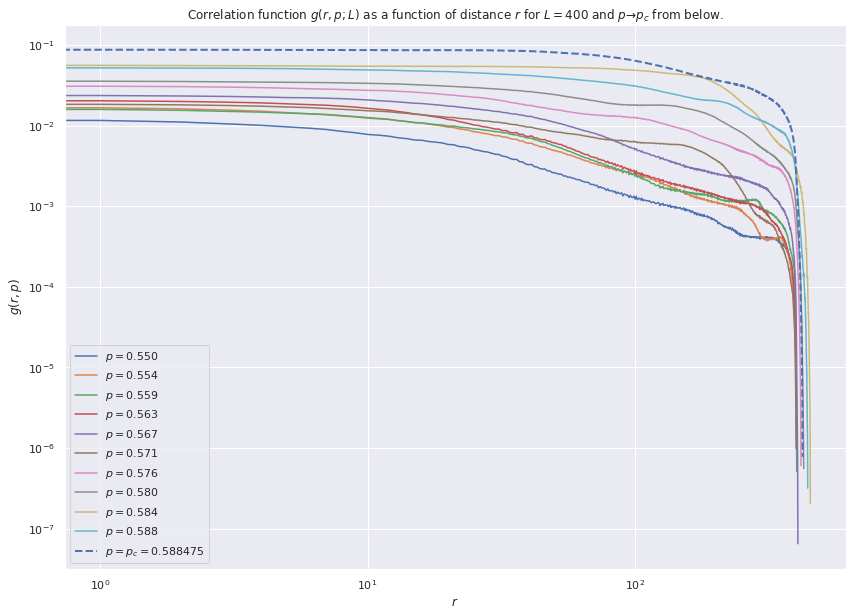

In [5]:
fig = plt.figure(figsize=(14, 10))

p_below = np.linspace(0.55, p_c, 11)[:-1]
S_below = np.zeros_like(p_below)
i = 0

for p in tqdm.tqdm_notebook(p_below):
    g = correlation_function(p, L)
    S_below[i] = (np.trapz(g))
    r = np.arange(len(g))
    plt.loglog(r, g, label=fr"$p = {p:.3f}$")
    i += 1

plt.loglog(r_c, g_c, "--", label=fr"$p = p_c = {p}$", lw=2)
    
plt.legend(loc="best")
plt.xlabel(r"$r$")
plt.ylabel(r"$g(r, p)$")
plt.title(fr"Correlation function $g(r, p; L)$ as a function of distance $r$ for $L = {L}$ and $p \to p_c$ from below.")
plt.show()

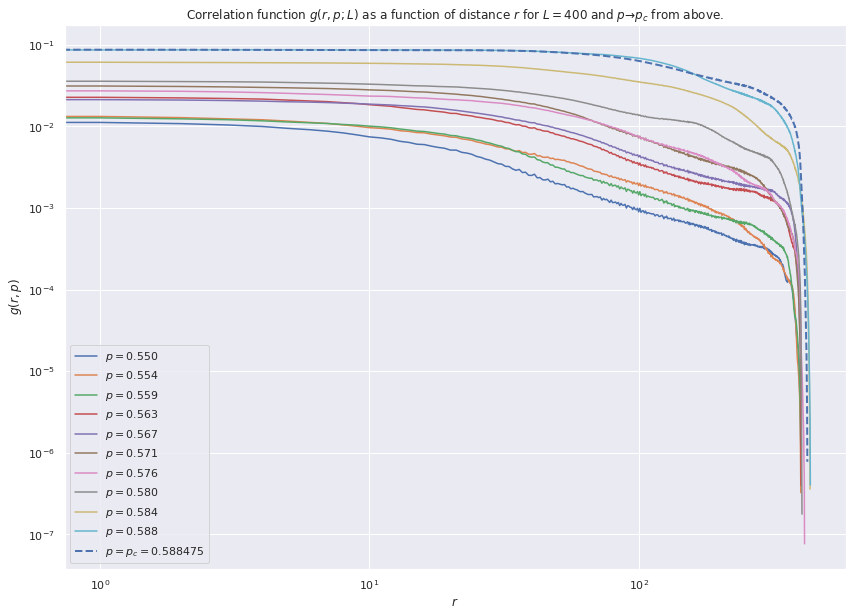

In [6]:
fig = plt.figure(figsize=(14, 10))

p_above = np.linspace(0.55, p_c, 11)[:-1]
S_above = np.zeros_like(p_above)
i = 0

for p in tqdm.tqdm_notebook(p_above):
    g = correlation_function(p, L)
    S_above[i] = (np.trapz(g))
    r = np.arange(len(g))
    plt.loglog(r, g, label=fr"$p = {p:.3f}$")
    i += 1

plt.loglog(r_c, g_c, "--", label=fr"$p = p_c = {p}$", lw=2)
    
plt.legend(loc="best")
plt.xlabel(r"$r$")
plt.ylabel(r"$g(r, p)$")
plt.title(fr"Correlation function $g(r, p; L)$ as a function of distance $r$ for $L = {L}$ and $p \to p_c$ from above.")
plt.show()

Here we have plotted the correlation function $g(r, p; L)$ as a function of inter-site distance $r$ (taxi-cab metric). We see how the correlation function falls rapidly to zero when reach a threshold.

We now wish to find the correlation length $\xi(p, L)$ and plot it as a function of $|p - p_c|$. We know that the average cluster size, $S$, is given by
\begin{align}
    S = \sum_{j} g(r_j, p)
    = \int g(r, p) dr.
\end{align}
Furthermore, as $p \to p_c$ we have the scaling
\begin{align}
    S \propto |p - p_c|^{-\gamma} \propto \xi^{2 - \eta}.
\end{align}
Rewriting, we find the relation
\begin{align}
    \xi \propto |p - p_c|^{-\nu},
\end{align}
where we introduced the exponent $\nu = \gamma / (2 - \eta)$.

In [7]:
# Computing the difference, |p - p_c|
p_min_pc_below = np.abs(p_below - p_c)
p_min_pc_above = np.abs(p_above - p_c)

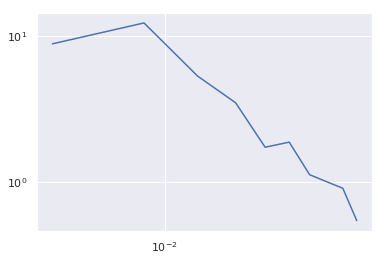

In [8]:
plt.loglog(p_min_pc_below, S_below)
plt.show()

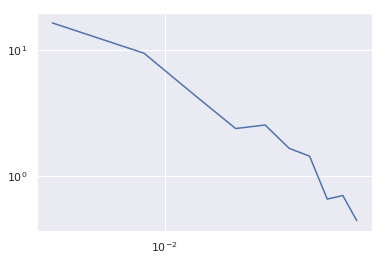

In [9]:
plt.loglog(p_min_pc_above, S_above)
plt.show()